In [3]:
# Reading Data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Data Preprocessing 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

# Downlaod Model
import pickle

In [4]:
path_folder = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
class_name = os.listdir(path_folder)
class_name.sort()
class_name = class_name[:21]  # Select the first 21 classes if they are at the start
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print(f"Loading Folder -- {folder} | The Count of Classes ==> {count}")
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (100, 100))  # Resize to match model input size
        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")


Loading Folder -- Apple___Apple_scab | The Count of Classes ==> 0
Loading Folder -- Apple___Black_rot | The Count of Classes ==> 1
Loading Folder -- Apple___Cedar_apple_rust | The Count of Classes ==> 2
Loading Folder -- Apple___healthy | The Count of Classes ==> 3
Loading Folder -- Blueberry___healthy | The Count of Classes ==> 4
Loading Folder -- Cherry_(including_sour)___Powdery_mildew | The Count of Classes ==> 5
Loading Folder -- Cherry_(including_sour)___healthy | The Count of Classes ==> 6
Loading Folder -- Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot | The Count of Classes ==> 7
Loading Folder -- Corn_(maize)___Common_rust_ | The Count of Classes ==> 8
Loading Folder -- Corn_(maize)___Northern_Leaf_Blight | The Count of Classes ==> 9
Loading Folder -- Corn_(maize)___healthy | The Count of Classes ==> 10
Loading Folder -- Grape___Black_rot | The Count of Classes ==> 11
Loading Folder -- Grape___Esca_(Black_Measles) | The Count of Classes ==> 12
Loading Folder -- Grape___Le

In [5]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [6]:
print(data.shape)

(39050, 100, 100, 3)


In [7]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [8]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31240, 100, 100, 3), (31240, 21), (7810, 100, 100, 3), (7810, 21))

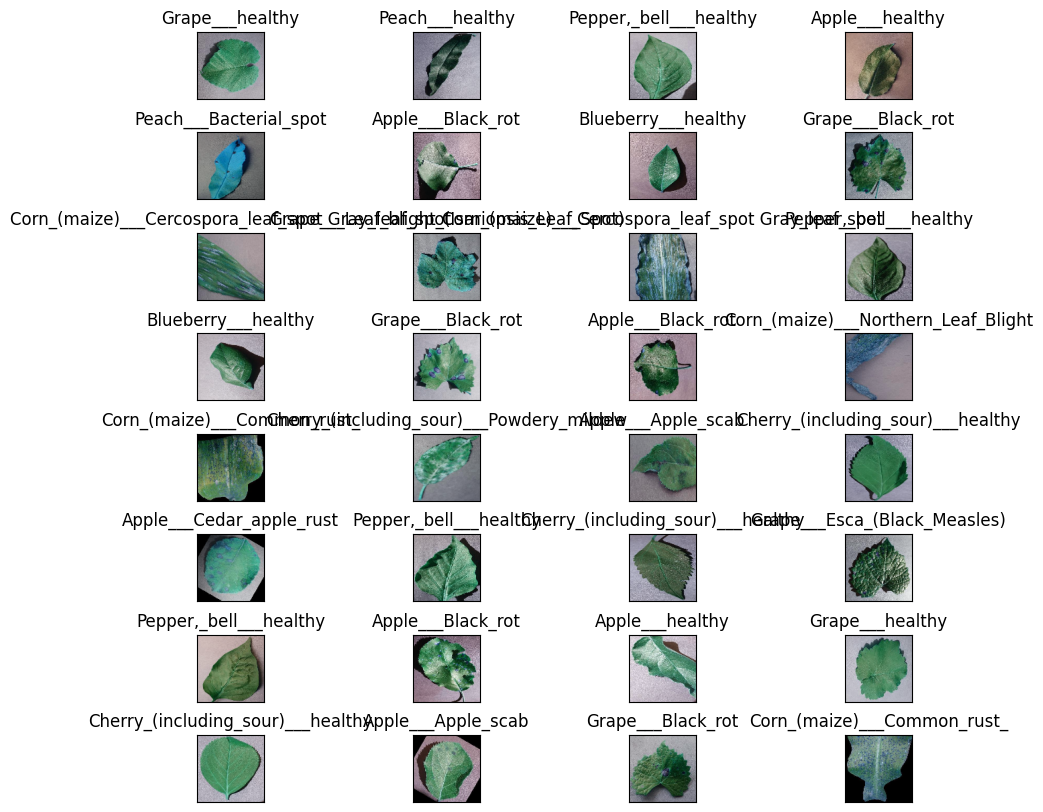

In [10]:
plt.figure(figsize=(10, 10))
for i in range(32):
    plt.subplot(8, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

# Adjust vertical and horizontal space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.7)
plt.show()


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation="relu", padding="same"))
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(21, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(x_train, y_train, 
                    epochs=9, 
                    validation_data=(x_test, y_test) 
                    )


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 100, 100, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 50, 50, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 50, 50, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 25, 25, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_8             │ (None, 12, 12, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 21)             │           693 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,249,653 (4.77 MB)

 Trainable params: 1,249,653 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 258s 262ms/step - accuracy: 0.2559 - loss: 2.3565 - val_accuracy: 0.7005 - val_loss: 0.9471
Epoch 2/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 252s 258ms/step - accuracy: 0.6248 - loss: 1.1324 - val_accuracy: 0.8236 - val_loss: 0.5309
Epoch 3/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 256s 262ms/step - accuracy: 0.7358 - loss: 0.8004 - val_accuracy: 0.8489 - val_loss: 0.4293
Epoch 4/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 250s 255ms/step - accuracy: 0.7931 - loss: 0.6349 - val_accuracy: 0.8882 - val_loss: 0.3440
Epoch 5/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 258s 264ms/step - accuracy: 0.8348 - loss: 0.5073 - val_accuracy: 0.9168 - val_loss: 0.2530
Epoch 6/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 250s 255ms/step - accuracy: 0.8661 - loss: 0.4251 - val_accuracy: 0.8985 - val_loss: 0.3125
Epoch 7/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 252s 258ms/step - accuracy: 0.8833 - loss: 0.3696 - val_accuracy: 0.9320 - val_loss: 0.2140
Epoch 8/9
977/977 ━━━━━━━━━━━━━━━━━━━━ 250s 255ms/step - accuracy: 0.9002 - loss: 0

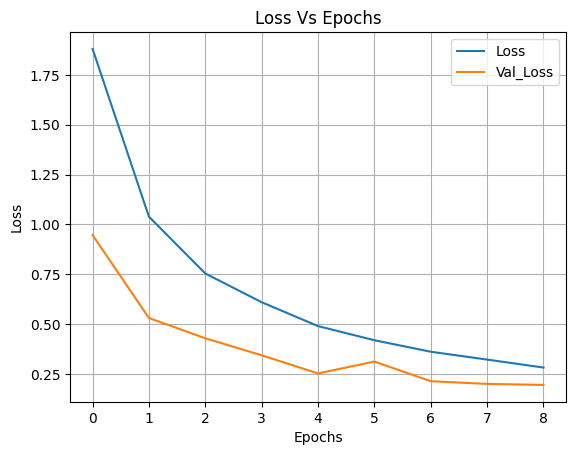

In [13]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

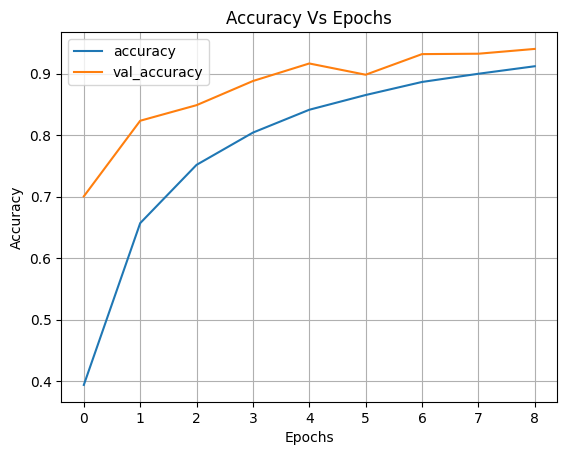

In [14]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.9449 - loss: 0.1782
The Accuracy Testing Data is ==> 0.9404609203338623 %
The loss Testing Data is ==> 0.19528785347938538


In [18]:
# Save Model
with open("/kaggle/working/amanking.pkl", "wb") as f:
    pickle.dump(model, f)
model.save('/kaggle/working/amanking.h5')